In [12]:
import matplotlib.pyplot as plt
import numpy as np

def draw(x_axis, y_axis, label, color, x_label, y_label, title, lw):
    plt.figure(figsize=(15, 5))
    plt.grid(alpha=0.3)
    plt.style.use('dark_background')
    plt.plot(x_axis, y_axis, label=label, color=color, linewidth=lw)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(loc='upper right')
    plt.show()

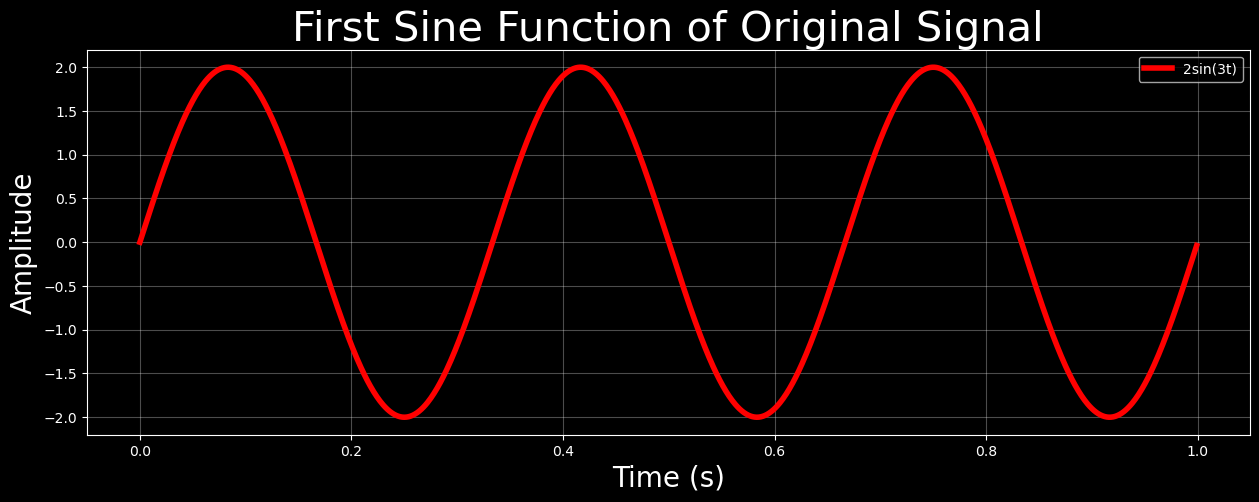

In [14]:
dt = 0.001
t = np.arange(0, 1, dt)
sin_3t = 2 * np.sin(2 * np.pi * 3 * t)

draw(x_axis = t, y_axis = sin_3t, label = "2sin(3t)", color = "r", x_label = 'Time (s)', y_label = "Amplitude", title = "First Sine Function of Original Signal", lw = 4)

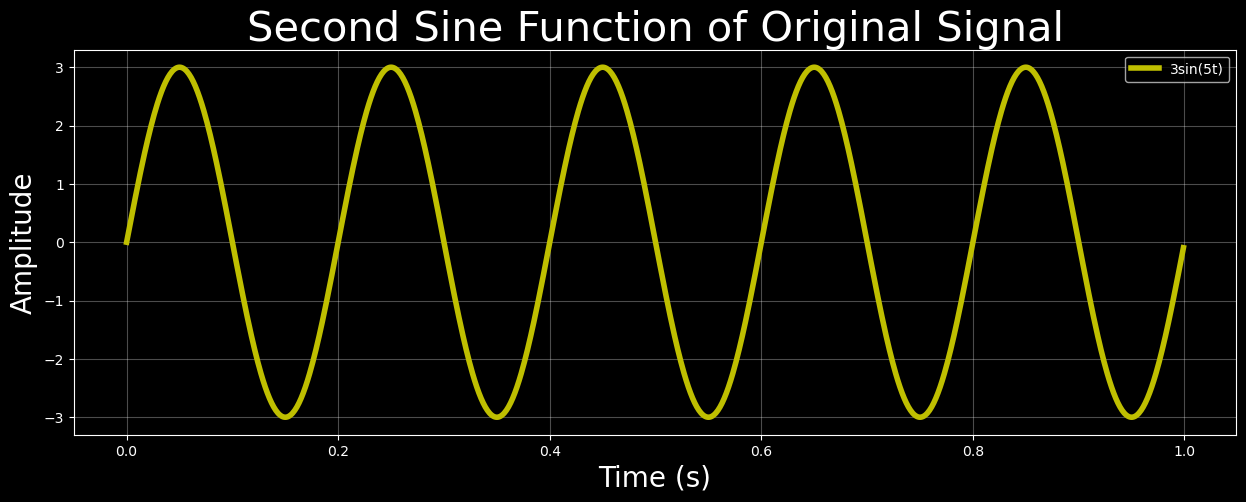

In [15]:
sin_5t = 3 * np.sin(2 * np.pi * 5 * t)
draw(x_axis = t, y_axis = sin_5t, label = "3sin(5t)", color = "y", x_label = 'Time (s)', y_label = "Amplitude", title = "Second Sine Function of Original Signal", lw = 4)

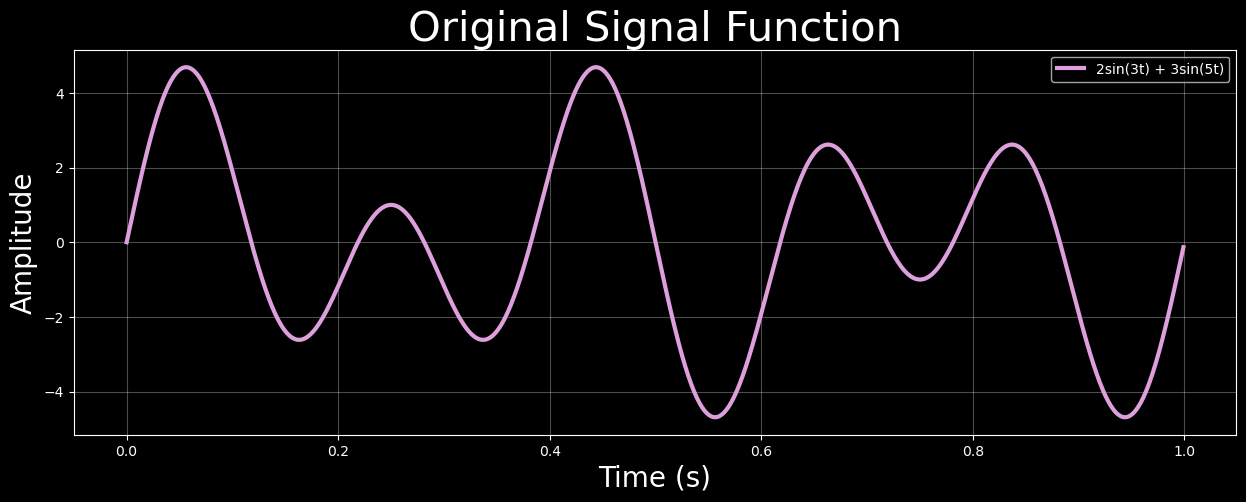

In [17]:
Original_Signal = sin_3t + sin_5t
draw(x_axis = t, y_axis = Original_Signal, label = "2sin(3t) + 3sin(5t)", color = "plum", x_label = 'Time (s)', y_label = "Amplitude", title = "Original Signal Function", lw = 3)

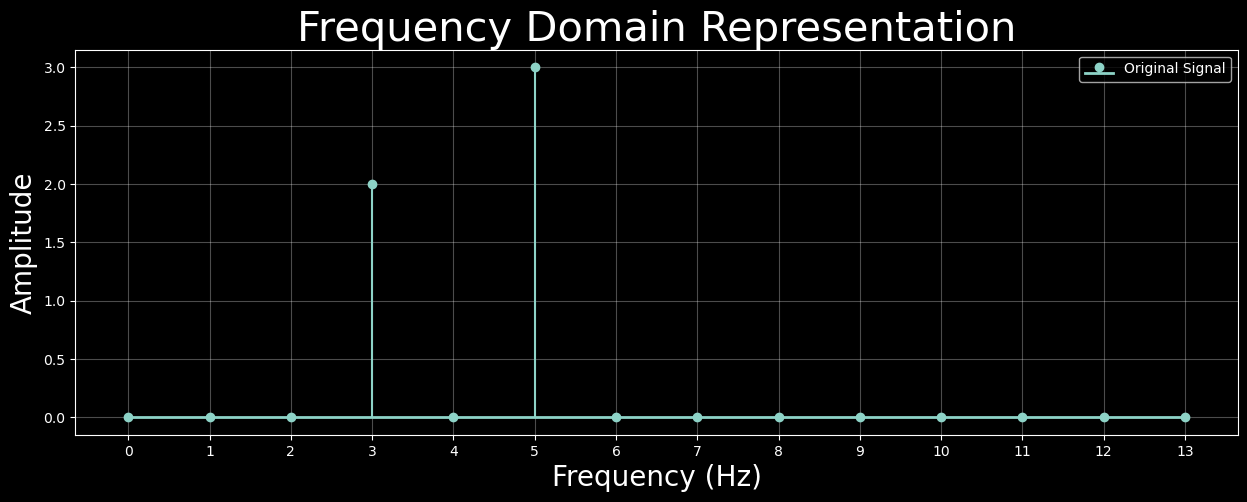

In [32]:
signal_fft = np.fft.fft(Original_Signal)
freqs = np.fft.fftfreq(len(Original_Signal), dt)

# Compute the magnitudes of the Fourier coefficients and normalize them
magnitudes = 2 * np.abs(signal_fft) / len(Original_Signal)

# Plot the frequency domain representation of the signal for the frequencies of interest
plt.figure(figsize=(15, 5))
plt.grid(alpha=0.3)
plt.xticks(np.arange(14))
plt.style.use('dark_background')
plt.title('Frequency Domain Representation', fontsize=30)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.stem(freqs[:14], magnitudes[:14], linefmt='C0-', markerfmt='C0o', basefmt='C0-', label='Original Signal', use_line_collection=True)
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.legend()
plt.savefig('fr_rep1.png')
plt.show()

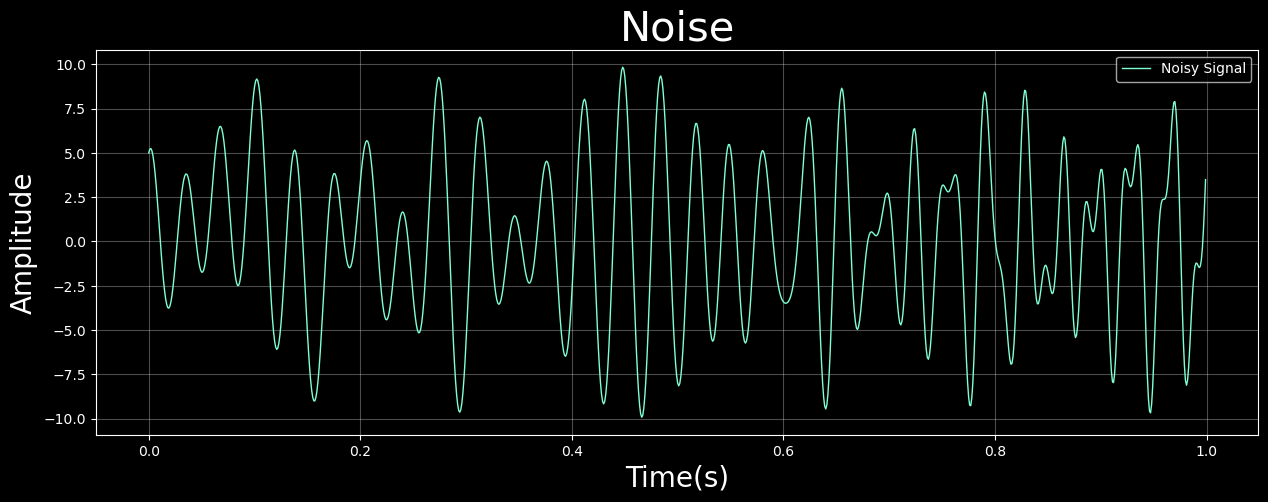

In [38]:
#Generate Noisy Signal
sin_23t = 2 * np.sin(2 * np.pi * 23 * t)
cos_29t = 5 * np.cos(2 * np.pi * 29 * t)
sin_31t = 3 * np.sin(2 * np.pi * 31 * t**2)

Noisy_Signal = sin_23t + cos_29t + sin_31t
draw(x_axis = t,y_axis = Noisy_Signal ,label="Noisy Signal",color="aquamarine", x_label = "Time(s)",y_label = "Amplitude", title="Noise", lw=1)


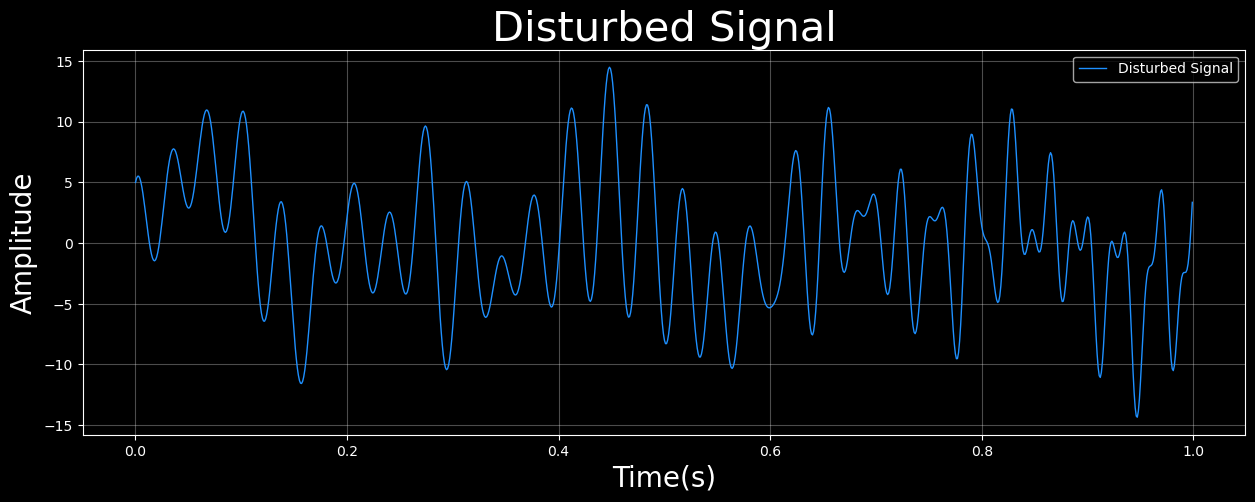

In [39]:
#Combined Signals to generate disturbed signal

Disturbed_Signal = Original_Signal + Noisy_Signal
draw(x_axis = t,y_axis =Disturbed_Signal ,label="Disturbed Signal",color="dodgerblue", x_label = "Time(s)",y_label = "Amplitude",title="Disturbed Signal", lw=1)

<function matplotlib.pyplot.show(close=None, block=None)>

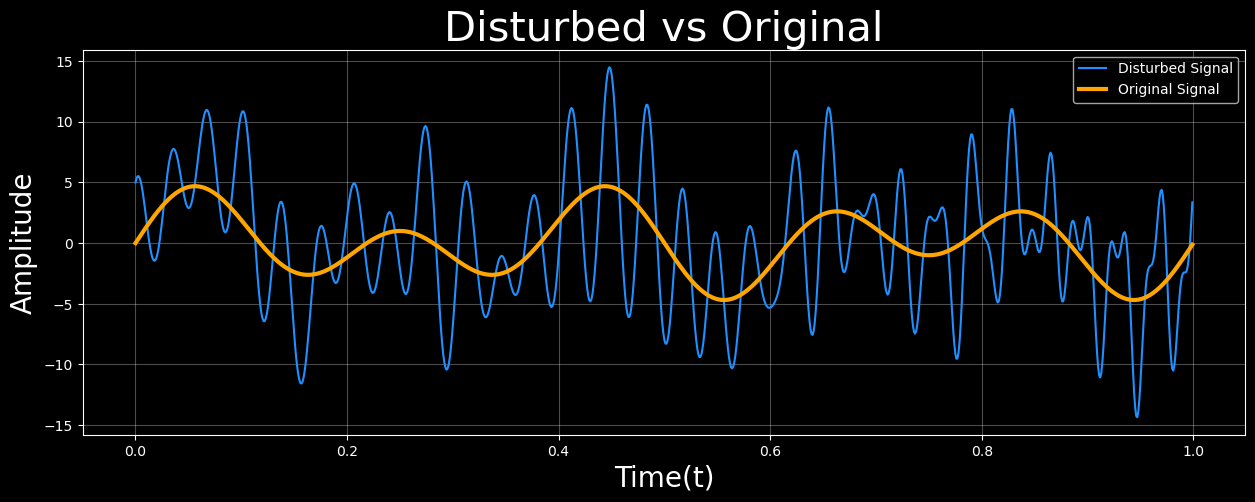

In [40]:
plt.figure(figsize = (15,5))
plt.grid(alpha = 0.3)
plt.style.use('dark_background')
plt.plot(t,Disturbed_Signal,label="Disturbed Signal", color="dodgerblue")
plt.plot( t, Original_Signal ,label="Original Signal",color="orange",linewidth=3)
plt.xlabel("Time(t)", fontsize = 20)
plt.ylabel("Amplitude", fontsize= 20)
plt.title("Disturbed vs Original",fontsize = 30)
plt.legend(loc='upper right')
plt.show

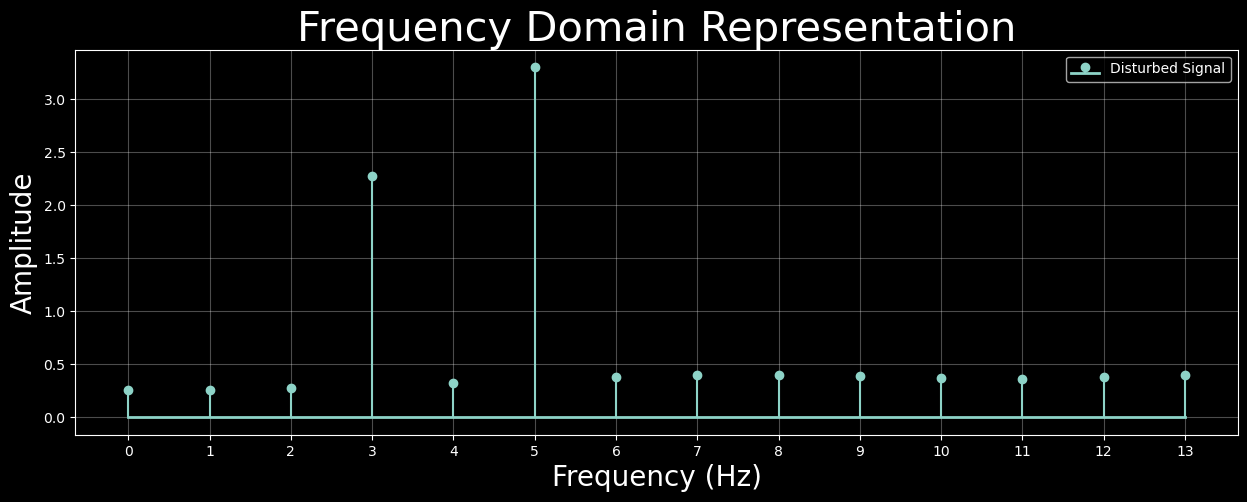

In [41]:
signal_fft = np.fft.fft(Disturbed_Signal)
freqs = np.fft.fftfreq(len(Disturbed_Signal), dt)
magnitudes = 2 * np.abs(signal_fft) / len(Disturbed_Signal)

plt.figure(figsize=(15, 5))
plt.grid(alpha=0.3)
plt.xticks(np.arange(14))
plt.style.use('dark_background')
plt.title('Frequency Domain Representation', fontsize=30)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.stem(freqs[:14], magnitudes[:14], linefmt='C0-', markerfmt='C0o', basefmt='C0-', label='Disturbed Signal', use_line_collection=True)
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.legend()
plt.savefig('fr_rep1.png')
plt.show()

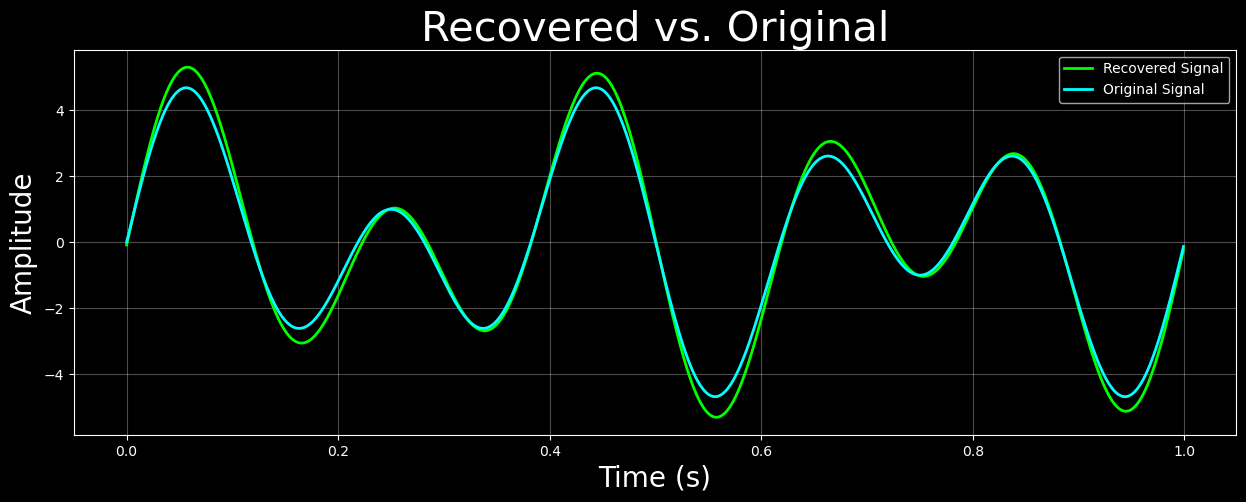

In [47]:
threshold = 1.0
mask = np.logical_or(np.abs(np.fft.fftfreq(len(Disturbed_Signal), dt)) == 3, np.abs(np.fft.fftfreq(len(Disturbed_Signal), dt)) == 5)
mask *= magnitudes > threshold
filtered_fft = mask * signal_fft
filtered_signal = np.fft.ifft(filtered_fft).real

plt.figure(figsize=(15, 5))
plt.plot(t, filtered_signal, label='Recovered Signal', color='lime', linewidth=2)
#plt.plot(t, Disturbed_Signal, label='Disturbed Signal', color='orange', linewidth=2)
plt.plot(t, Original_Signal, label='Original Signal', color='cyan', linewidth=2)
plt.grid(alpha=0.3)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.title('Recovered vs. Original', fontsize=30)
plt.legend()
plt.show()

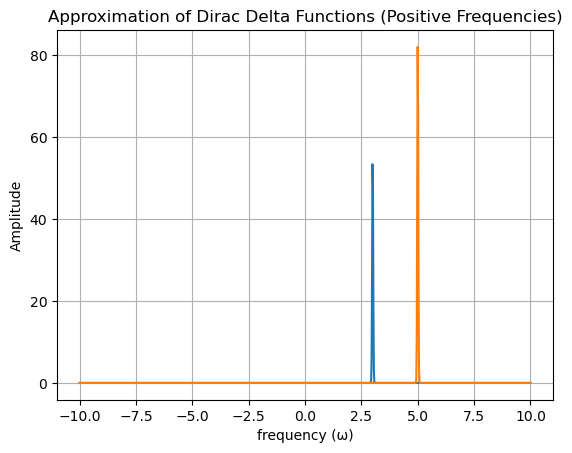

In [23]:
import numpy as np
import matplotlib.pyplot as plt

frequencies = [3, -3, 5, -5]
amplitudes = [np.pi, -np.pi, (3/2)*np.pi, -(3/2)*np.pi]

x = np.linspace(-10, 10, 1000)

delta_values = [np.exp(-((x - f) ** 2) / 0.001) / np.sqrt(0.001 * np.pi) * amplitude for f, amplitude in zip(frequencies, amplitudes) if f > 0]

for delta in delta_values:
    plt.plot(x, delta)

plt.xlabel('frequency (ω)')
plt.ylabel('Amplitude')
plt.title('Approximation of Dirac Delta Functions (Positive Frequencies)')
plt.grid(True)
plt.show()

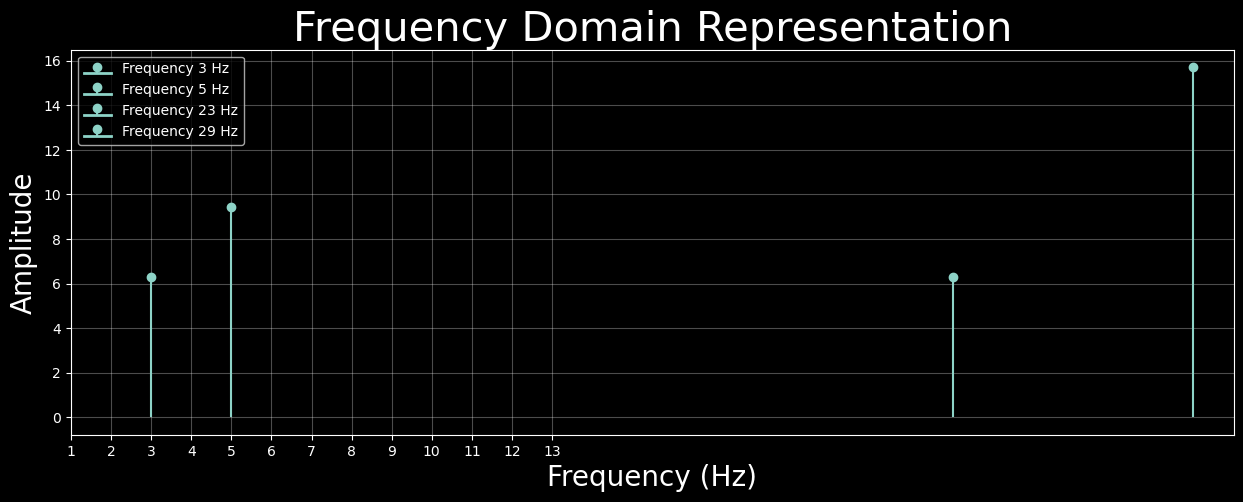

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Frequencies and magnitudes from the Fourier Transform equation
frequencies = [3, 5, 23, 29]
magnitudes = [-2*np.pi, -3*np.pi, -2*np.pi, 5*np.pi]

# Plotting the individual components
plt.figure(figsize=(15, 5))
plt.grid(alpha=0.3)
plt.xticks(np.arange(14))
plt.style.use('dark_background')
plt.title('Frequency Domain Representation', fontsize=30)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)

for freq, mag in zip(frequencies, magnitudes):
    plt.stem([freq], [np.abs(mag)], linefmt='C0-', markerfmt='C0o', basefmt='C0-', label=f'Frequency {freq} Hz', use_line_collection=True)

plt.setp(plt.gca().get_lines(), linewidth=2)
plt.legend()
plt.xlim(1, 30)  # Set the x-axis limits
plt.savefig('fr_rep2.png')
plt.show()

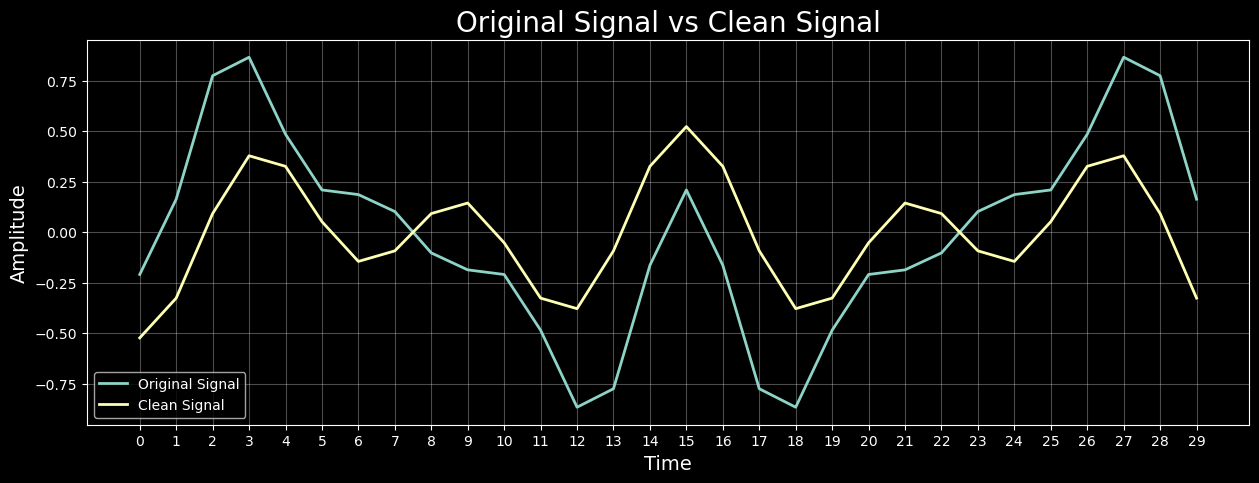

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Frequencies and magnitudes from the Fourier Transform equation
frequencies = np.array([3, 5, 23, 29])
magnitudes = np.array([-2*np.pi, -3*np.pi, -2*np.pi, 5*np.pi])

# Original signal in the frequency domain
original_signal_fft = np.zeros(30)
original_signal_fft[frequencies] = magnitudes

# Anti-noise signal in the frequency domain
anti_noise_fft = np.zeros_like(original_signal_fft)
mask = np.abs(np.arange(len(original_signal_fft))) > 10
anti_noise_fft[mask] = -original_signal_fft[mask]

# Combine the original signal and anti-noise signal in the frequency domain
clean_signal_fft = original_signal_fft + anti_noise_fft

# Convert the original signal and clean signal back to the time domain
original_signal = np.fft.ifft(original_signal_fft).real
clean_signal = np.fft.ifft(clean_signal_fft).real

# Plotting the original signal and clean signal
plt.figure(figsize=(15, 5))
plt.grid(alpha=0.3)
plt.xticks(np.arange(30))
plt.style.use('dark_background')
plt.title('Original Signal vs Clean Signal', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)

# Plot the original signal
plt.plot(np.arange(len(original_signal)), original_signal, label='Original Signal', color='C0')

# Plot the clean signal
plt.plot(np.arange(len(clean_signal)), clean_signal, label='Clean Signal', color='C1')

plt.setp(plt.gca().get_lines(), linewidth=2)
plt.legend()
plt.show()